(visualise)=
# Visualisation

After reading the first part of the book, you understand the basics of the most important tools for doing data science. Now it’s time to start diving into the details. In this part of the book, you’ll learn about visualising data in further depth (in {ref}`vis-layers`), and get further stuck into the details of the different kinds of data visualisation (in {ref}`exploratory-data-analysis` and {ref}`communicate-plots`). In this short chapter, we discuss the different ways to create visualisations, and the different purposes of visualisations.

## Philosophies of data visualisation

There are broadly two categories of approach to using code to create data visualisations: *imperative* (build what you want from individual elements) and *declarative* (say what you want from a list of pre-existing options). Choosing which to use involves a trade-off: imperative libraries offer you flexibility but at the cost of some verbosity; declarative libraries offer you a quick way to plot your data, but only if it’s in the right format to begin with, and customisation to special chart types is more difficult.

Python has many excellent plotting packages, including perhaps the most powerful imperative plotting package around, **matplotlib**, and an amazing declarative library that we already saw, **lets-plot**. These two libraries will get you a long way, and each could be worthy of an entire book themselves. Fortunately for us, though, we can do 95% of what we need with a small number of commands from one or the other of them. In general, to keep this book as light as possible, we've opted to use **lets-plot** wherever possible—and {ref}`vis-layers` is going to take you on a more in-depth tour of how to use it yourself.

## Purposes of data visualisation

Data visualisation has all kinds of different purposes. It can be useful to bear in mind three broad categories of visualisation that are out there:

- exploratory
- scientific
- narrative

Let's look at each in a bit more detail.

### Exploratory Data Viz

The first of the three kinds is *exploratory data visualisation*, and it's the kind that you do when you're looking and data and trying to understand it. Just plotting the data is a really good strategy for getting a feel for any issues there might be. This is perhaps most famously demonstrated by Anscombe's quartet: four different datasets with the same mean, standard deviation, and correlation but very different data distributions.

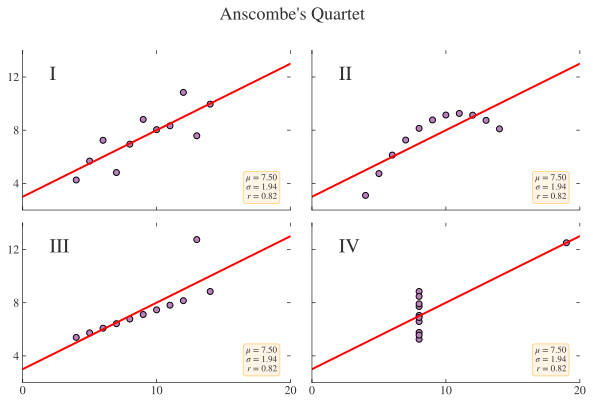

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use("https://github.com/aeturrell/python4DS/raw/main/plot_style.txt")
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {"I": (x, y1), "II": (x, y2), "III": (x, y3), "IV": (x4, y4)}

fig, axs = plt.subplots(
    2,
    2,
    sharex=True,
    sharey=True,
    figsize=(10, 6),
    gridspec_kw={"wspace": 0.08, "hspace": 0.08},
)
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va="top")
    ax.tick_params(direction="in", top=True, right=True)
    ax.plot(x, y, "o")

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color="r", lw=2)

    # add text box for the statistics
    stats = (
        f"$\\mu$ = {np.mean(y):.2f}\n"
        f"$\\sigma$ = {np.std(y):.2f}\n"
        f"$r$ = {np.corrcoef(x, y)[0][1]:.2f}"
    )
    bbox = dict(boxstyle="round", fc="blanchedalmond", ec="orange", alpha=0.5)
    ax.text(
        0.95,
        0.07,
        stats,
        fontsize=9,
        bbox=bbox,
        transform=ax.transAxes,
        horizontalalignment="right",
    )

plt.suptitle("Anscombe's Quartet")
plt.show()

Exploratory visualisation is usually quick and dirty, and flexible too. Some exploratory data viz can be automated, and there's a whole host of packages to help with this, including [**skimpy**](https://aeturrell.github.io/skimpy/).

Beyond you and perhaps your co-authors/collaborators, however, not many other people should be seeing your exploratory visualisation! They will typically be worked up quickly, be numerous, and be throw-away. We'll look more at this in {ref}`exploratory-data-analysis`.

### Scientific Data Viz

The second kind, scientific data visualisation, is the prime cut of your exploratory visualisation. It's the kind of plot you might include in a more technical paper, the picture that says a thousand words. I often think of the first image of a black hole {cite:t}`akiyama2019first` as a prime example of this. You can get away with having a high density of information in a scientific plot and, in short format journals, you may need to. The journal Physical Review Letters, which has an 8 page limit, has a classic of this genre in more or less every issue. Ensuring that important values can be accurately read from the plot is especially important in these kinds of charts. But they can also be the kind of plot that presents the killer results in a study; they might not be exciting to people who don't look at charts for a living, but they might be exciting and, just as importantly, understandable by your peers.

This type of visualisation is especially popular in the big science journals like *Nature* and *Science*, where space is at a premium. We won't cover this type of plot in this book, because it tends to be very bespoke.

### Narrative Data Viz

The third and final kind is narrative data visualisation. This is the one that requires the most thought in the step where you go from the first view to the end product. It's a visualisation that doesn't just show a picture, but gives an insight. These are the kind of visualisations that you might see in the *Financial Times*, *The Economist*, or on the *BBC News* website. They come with aids that help the viewer focus on the aspects that the creator wanted them to (you can think of these aids or focuses as doing for visualisation what bold font does for text). They're well worth using in your work, especially if you're trying to communicate a particular narrative, and especially if the people you're communicating with don't have deep knowledge of the topic. You might use them in a paper that you hope will have a wide readership, in a blog post summarising your work, or in a report intended for a policymaker.

You can find more information on the topic of communicating via data visualisations in the {ref}`communicate-plots` chapter.